### 📊 Confusion Matrix Heatmap for Gaussian Naive Bayes Classification 📊

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data


In [144]:
df = pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [145]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Prepare data


In [146]:
x = df.iloc[:,0:15].values
x

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  0.  ,  48.  ,   2.  , ...,  22.  ,  84.  ,  86.  ],
       [  0.  ,  44.  ,   1.  , ...,  19.16,  86.  ,    nan],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

In [147]:
y = df.iloc[:, 15].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Handle missing values


In [148]:
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)


#### Split the data

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#### Train the Naive Bayes classifier


In [150]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

#### Predict on the test set


In [151]:
y_pred1 = classifier.predict(x_test)
x_test

array([[ 0.        , 47.        ,  1.        , ..., 27.64      ,
        75.        , 62.        ],
       [ 0.        , 58.        ,  2.        , ..., 23.36      ,
        60.        , 73.        ],
       [ 0.        , 61.        ,  2.        , ..., 38.46      ,
        57.        , 78.        ],
       ...,
       [ 0.        , 46.        ,  1.        , ..., 26.22      ,
        62.        , 75.        ],
       [ 1.        , 59.        ,  2.        , ..., 28.7       ,
        72.        , 81.96675325],
       [ 0.        , 41.        ,  3.        , ..., 22.91      ,
        75.        , 70.        ]])

#### Evaluation


In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred1))

Accuracy Score: 0.8160377358490566


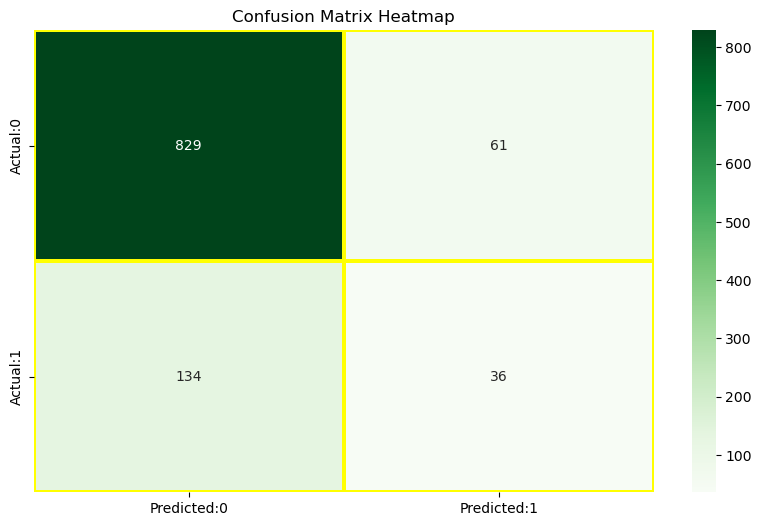

In [153]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
conf = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Greens', linecolor='yellow', linewidths=1.5)
plt.title('Confusion Matrix Heatmap', fontsize=12)
plt.show()


#### Classification Report


In [154]:
print("Classification Report:\n", classification_report(y_test, y_pred1))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       890
           1       0.37      0.21      0.27       170

    accuracy                           0.82      1060
   macro avg       0.62      0.57      0.58      1060
weighted avg       0.78      0.82      0.79      1060

